# Proyecto Final - Patrik Franco Pereda Matute

## 1. Definición del Problema y Descripción del Dataset

### 🎯 Definición del problema
En la industria musical, entender qué hace que una canción sea popular es una tarea clave para artistas, productores y plataformas como Spotify. El objetivo de este proyecto es analizar las características acústicas de canciones y predecir su nivel de popularidad utilizando técnicas de análisis de datos y aprendizaje automático.

### 📈 Objetivo del proyecto
Construir un modelo de machine learning capaz de predecir la popularidad de una canción basándose en características como la energía, el tempo, el danceability, entre otras. Además, se buscará descubrir relaciones entre estas características y el éxito de una canción.

### 📊 Descripción de los datos
Se utilizarán dos archivos:

`tracks.csv:` contiene información de canciones, incluyendo características acústicas (tempo, energy, valence, loudness, etc.), así como su popularidad.


`artists.csv:` contiene información adicional de los artistas correspondientes.


`Fuente:` Datasets generados a partir de la API pública de Spotify.


`Tamaño:`


    tracks.csv: contiene miles de canciones con múltiples características.


    artists.csv: proporciona contexto adicional sobre los artistas.


`Variable objetivo:` popularity, un valor numérico entre 0 y 100 que representa la popularidad estimada de la canción.


🧠 __Relevancia:__

Este análisis permite entender patrones que contribuyen al éxito musical y proporciona una herramienta predictiva útil para la industria. También tiene valor educativo como ejemplo práctico de ciencia de datos aplicada al entretenimiento.

## 2. Análisis Exploratorio de los Datos (EDA)

### 📌 Estructura:
    Limpieza de datos

    Visualización de distribuciones

    Matriz de correlación

    Comparación de variables con la popularidad

    Explicación de cada gráfico


### 💻 Empezamos con el código paso a paso:
__🔹 Paso 1: Cargar y revisar los datos__


In [3]:
import pandas as pd

# Cargar los archivos
tracks = pd.read_csv("../data/tracks.csv")
artists = pd.read_csv("../data/artists.csv")

# Vista rápida de los datos
print(tracks.shape)
tracks.head()

(586672, 20)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


__🔹 Paso 2: Limpiar los datos__

In [2]:
# Verificar valores nulos
print(tracks.isnull().sum())

# Eliminar columnas poco útiles
tracks = tracks.drop(columns=["id", "name", "id_artists", "release_date", "explicit", "key", "mode", "time_signature"])

# Eliminar filas con valores nulos
tracks = tracks.dropna()

# Verificar duplicados
tracks = tracks.drop_duplicates()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


### 💻 Gráficos y explicaciones:

__🔹 Gráfico 1: Distribución de la popularidad__

📚 ¿Qué muestra?
 Un histograma que nos dice cuántas canciones tienen cada nivel de popularidad (del 0 al 100).
 
🧠 ¿Por qué lo hacemos?
 Para saber si el dataset está equilibrado. Por ejemplo, si la mayoría de canciones tienen baja popularidad, eso puede afectar al modelo.

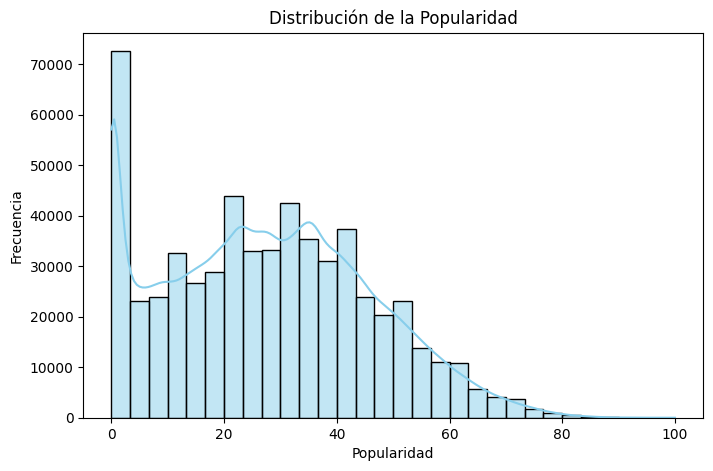

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(tracks["popularity"], bins=30, kde=True, color='skyblue')
plt.title("Distribución de la Popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Frecuencia")
plt.show()

__🔹 Gráfico 2: Boxplot de duración de canciones (en minutos)__

📚 ¿Qué muestra?
Este gráfico muestra la distribución de la duración de las canciones en minutos, destacando los valores extremos (outliers) que pueden indicar canciones demasiado cortas o largas.

🧠 ¿Por qué lo hacemos?
Convertimos la duración a minutos para facilitar la comprensión. Al ver la distribución, podemos identificar rápidamente si hay canciones que se desvían mucho del tiempo esperado, lo que podría influir en el análisis de patrones o tendencias.

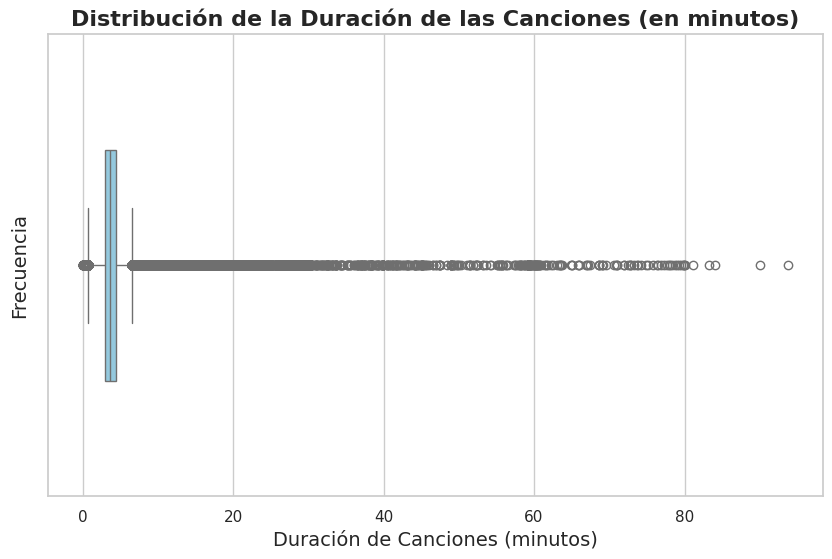

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos la duración de ms a minutos para que sea más comprensible
tracks['duration_min'] = tracks['duration_ms'] / 60000  # Convertimos de ms a minutos

plt.figure(figsize=(10, 6))

# Establecemos un estilo de gráfico más profesional
sns.set(style="whitegrid")

# Usamos el boxplot con un color más suave
sns.boxplot(x=tracks["duration_min"], color="skyblue", width=0.5)

# Añadimos un título más descriptivo y etiquetas
plt.title("Distribución de la Duración de las Canciones (en minutos)", fontsize=16, weight='bold')
plt.xlabel("Duración de Canciones (minutos)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)

# Mejoramos el formato del eje X para facilitar la lectura
plt.xticks(rotation=0)

# Mostramos el gráfico
plt.show()

__🔹 Gráfico 3: Matriz de correlación__

📚 ¿Qué muestra?
Este gráfico muestra una "tabla de colores" donde cada número indica qué tan fuerte es la relación entre dos características de las canciones. Si el número es alto (cerca de 1), las características están muy relacionadas; si es bajo (cerca de 0), significa que no están relacionadas.

🧠 ¿Por qué lo hacemos?
Queremos identificar qué características de las canciones están más relacionadas con su popularidad. Esto nos ayudará a construir un modelo que prediga mejor qué hace a una canción popular.

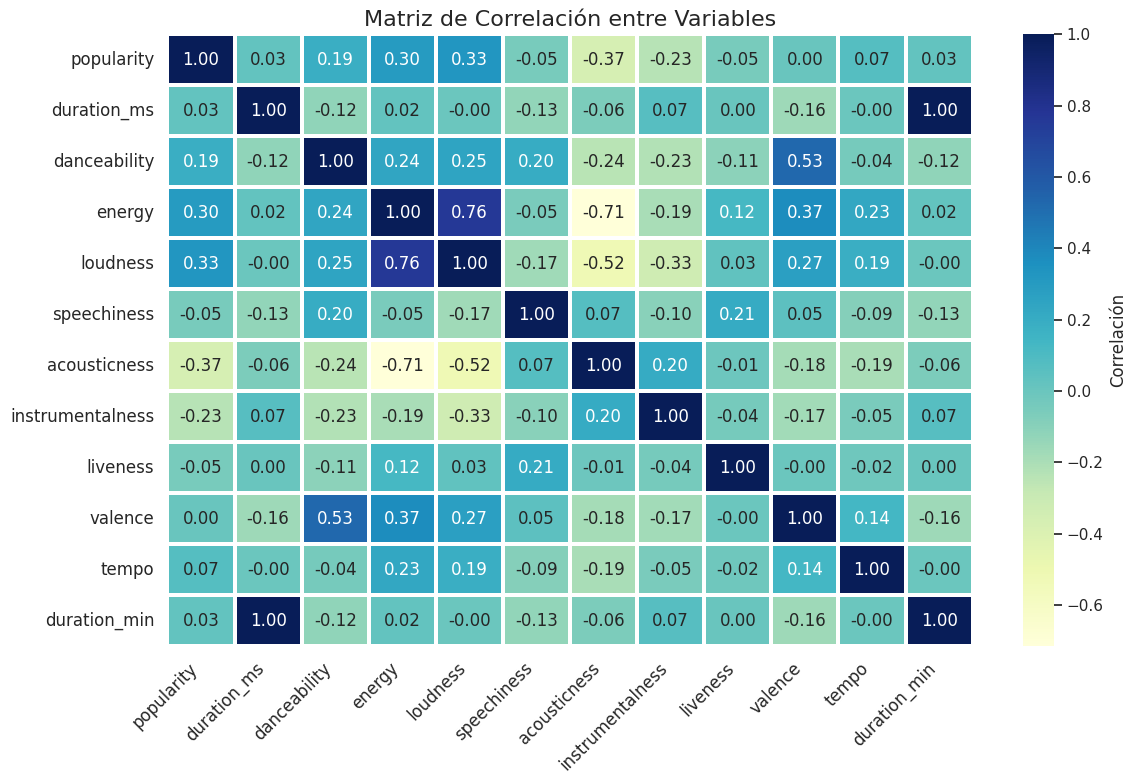

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
numeric_tracks = tracks.select_dtypes(include=['number'])

# Crear la figura y el gráfico
plt.figure(figsize=(12, 8))

# Calcular la matriz de correlación y dibujar el heatmap
sns.heatmap(numeric_tracks.corr(), annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'Correlación'}, linewidths=1.5)

# Añadir título y etiquetas
plt.title("Matriz de Correlación entre Variables", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar automáticamente para que todo encaje bien
plt.show()

__🔹 Gráfico 4: Popularidad vs Danceability__

📚 ¿Qué muestra?
Este gráfico muestra la relación entre la bailabilidad (danceability) de las canciones y su popularidad. En este caso, hemos añadido una línea de regresión (línea roja) que indica la tendencia general de cómo cambia la popularidad a medida que aumenta la bailabilidad. La danceability sigue siendo un valor entre 0.0 y 1.0, donde 0.0 significa que la canción no es bailable y 1.0 significa que es extremadamente bailable. Cada punto sigue representando una canción.

🧠 ¿Por qué lo hacemos?
Queremos analizar la relación entre la bailabilidad y la popularidad de una forma más clara y precisa. Al añadir la línea de regresión, podemos observar si existe una tendencia lineal entre estas dos variables. Si la línea tiene una pendiente ascendente, significa que las canciones más bailables tienden a ser más populares. Este tipo de análisis nos ayuda a entender mejor cómo estos dos factores se relacionan y nos da más claridad para realizar predicciones de cómo la bailabilidad podría influir en la popularidad de futuras canciones.

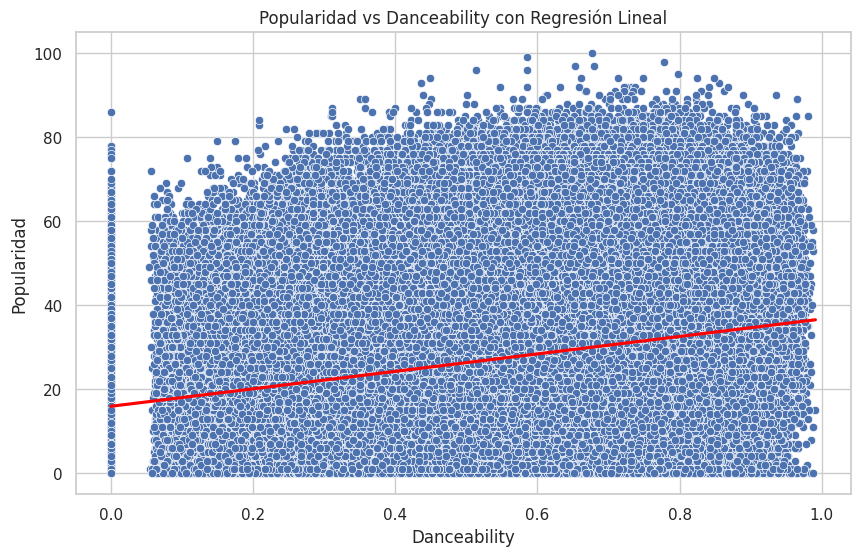

In [8]:
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión
sns.scatterplot(x="danceability", y="popularity", data=tracks)

# Añadir la línea de regresión
sns.regplot(x="danceability", y="popularity", data=tracks, scatter=False, color='red')

# Añadir títulos y etiquetas
plt.title("Popularidad vs Danceability con Regresión Lineal")
plt.xlabel("Danceability")
plt.ylabel("Popularidad")
plt.show()

__🔹 Gráfico 5: Popularidad vs Energy__

📚 ¿Qué muestra?
Este gráfico representa la relación entre la energía de una canción (qué tan intensa, rápida o potente suena) y su popularidad.
La "energy" es un valor entre 0.0 (muy calmada) y 1.0 (muy energética).
Cada punto verde representa una canción, mientras que la línea roja muestra la tendencia general: si al aumentar la energía también tiende a subir la popularidad.
 
🧠 ¿Por qué lo hacemos?
Queremos saber si las canciones más intensas o enérgicas tienden a ser más populares.
Si detectamos una relación clara, podríamos incluir esta variable como una de las más importantes a la hora de predecir si una canción tendrá éxito o no.
Este tipo de análisis es clave para construir modelos de machine learning con buena capacidad predictiva.

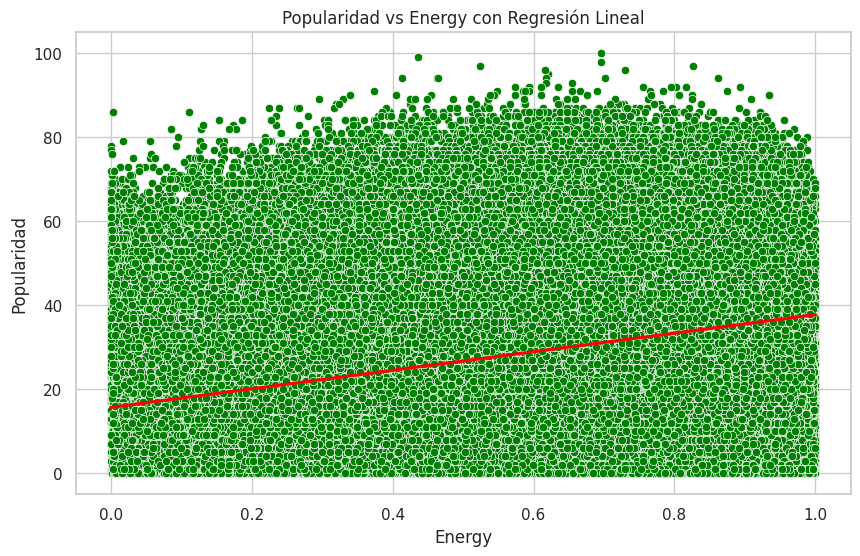

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión con puntos verdes
sns.scatterplot(x="energy", y="popularity", data=tracks, color='green')

# Añadir la línea de regresión en rojo
sns.regplot(x="energy", y="popularity", data=tracks, scatter=False, color='red')

# Añadir títulos y etiquetas
plt.title("Popularidad vs Energy con Regresión Lineal")
plt.xlabel("Energy")
plt.ylabel("Popularidad")
plt.show()

__🔹 Gráfico 6: Popularidad vs Valence (positividad)__

📚 ¿Qué muestra?
Este gráfico representa la relación entre la valence (una medida de cuán alegre o positiva suena una canción) y su popularidad.
La valence va de 0.0 (muy triste o melancólica) a 1.0 (muy feliz y positiva).
Cada punto morado representa una canción, y la línea roja muestra si hay una tendencia clara entre lo positiva que suena una canción y cuánta gente la escucha.
 
🧠 ¿Por qué lo hacemos?
Queremos saber si a la gente le atraen más las canciones alegres o las tristes.
Si descubrimos que las canciones con un alto nivel de positividad tienden a ser más populares, podríamos usar esa información como una pista útil en modelos predictivos para determinar el éxito musical.

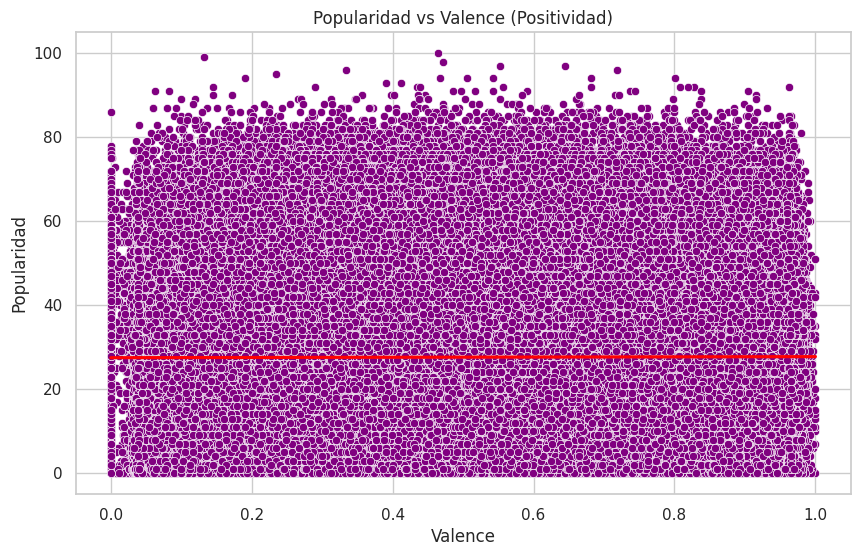

In [15]:
plt.figure(figsize=(10, 6))

# Crear gráfico de dispersión con puntos morados
sns.scatterplot(x="valence", y="popularity", data=tracks, color="purple")

# Agregar la línea de regresión en rojo
sns.regplot(x="valence", y="popularity", data=tracks, scatter=False, color="red")

# Títulos y etiquetas
plt.title("Popularidad vs Valence (Positividad)")
plt.xlabel("Valence")
plt.ylabel("Popularidad")
plt.show()

__🔹 Gráfico 7: Loudness vs Popularidad__

📚 ¿Qué muestra?
Este gráfico muestra cómo se relaciona el volumen promedio de una canción (medido en decibelios negativos, donde -60 es muy bajo y 0 es muy alto) con su popularidad.
Cada punto azul representa una canción, y la línea roja nos ayuda a ver si hay una tendencia general entre cuán fuerte suena una canción y qué tan popular es.
 
🧠 ¿Por qué lo hacemos?
Nos interesa saber si el volumen tiene impacto en la popularidad.
Por ejemplo, si descubrimos que las canciones más fuertes suelen ser más populares, podría influir en cómo se produce la música. Esta información también puede servir como una pista para construir modelos predictivos más certeros.

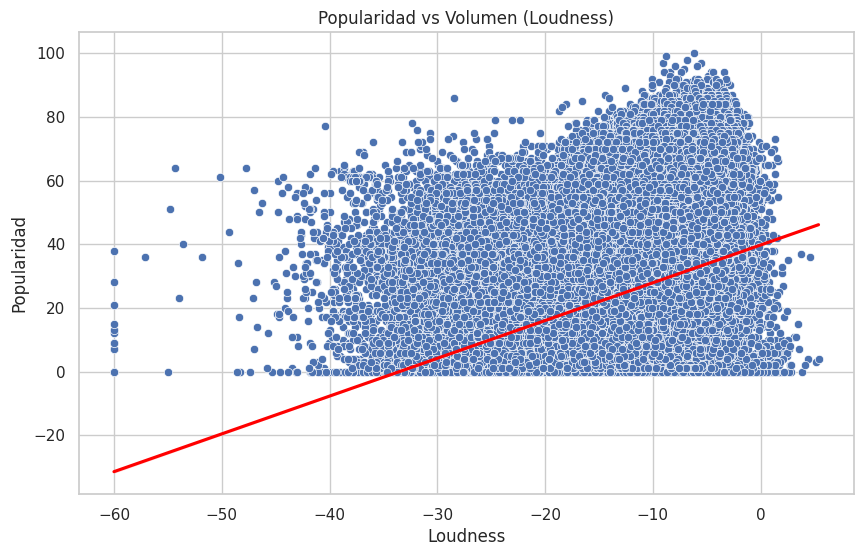

In [16]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión (color por defecto: azul)
sns.scatterplot(x="loudness", y="popularity", data=tracks)

# Línea de regresión en rojo
sns.regplot(x="loudness", y="popularity", data=tracks, scatter=False, color="red")

# Títulos y etiquetas
plt.title("Popularidad vs Volumen (Loudness)")
plt.xlabel("Loudness")
plt.ylabel("Popularidad")
plt.show()

__🔹 Gráfico 8: Distribución del Tempo__

📚 ¿Qué muestra?
Este gráfico es un histograma que muestra cómo se distribuye el tempo de las canciones, medido en BPM (beats per minute).
El tempo indica la velocidad o ritmo de una canción:

    Un BPM bajo (por ejemplo, 60) significa una canción lenta.

    Un BPM alto (por ejemplo, 160) indica una canción rápida.
    Las barras del gráfico muestran cuántas canciones hay dentro de ciertos rangos de velocidad.

🧠 ¿Por qué lo hacemos?
Queremos ver si hay un rango de tempo que se repite mucho, es decir, un "tempo común" en las canciones del dataset.
Esto también nos puede ayudar a descubrir si existe un tempo ideal que hace que las canciones sean más populares, lo cual sería útil para recomendaciones o predicciones musicales.

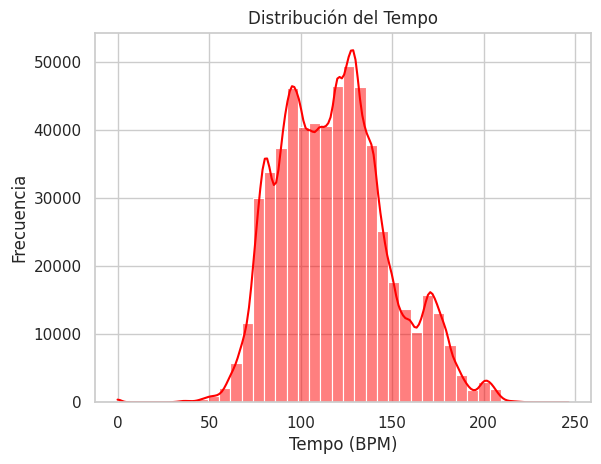

In [8]:
sns.histplot(tracks["tempo"], bins=40, kde=True, color="red")
plt.title("Distribución del Tempo")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Frecuencia")
plt.show()

## 3. Selección e Ingeniería de Características 

### 📌 ¿Qué es la Ingeniería de Características?
La ingeniería de características es el proceso de crear, transformar o seleccionar variables que mejorarán el rendimiento del modelo. A veces los datos en bruto no son suficientes, así que les damos una "vuelta de tuerca" para que el modelo los entienda mejor.

### 💼 Paso 1: Elegimos las variables más relevantes
Basándonos en la matriz de correlación del EDA, podemos seleccionar algunas variables que:

    Tienen correlación moderada o alta con la variable objetivo (popularity)
    
    Tienen sentido desde el punto de vista del problema

🎯 Variables que podrían ser útiles:
    
    danceability
    
    energy
    
    valence
    
    loudness
    
    tempo
    
    acousticness
    
    instrumentalness
    
    speechiness

Y descartamos otras que:

    No aportan mucho
    
    Tienen baja correlación con la popularidad
    
    Son redundantes o ruidosas

### 🛠️ Paso 2: Transformaciones o mejoras (Ingeniería)

Podemos hacer algunas transformaciones útiles:

    🔹 Normalizar/estandarizar variables como duration_ms, tempo, loudness, etc., para que estén en la misma escala.
    
    🔹 Transformar la duración a minutos: tracks["duration_min"] = tracks["duration_ms"] / 60000
    
    🔹 Crear una variable combinada (si tiene sentido): Por ejemplo, una "energía emocional" combinando valence y energy:
    tracks["emotional_energy"] = (tracks["valence"] + tracks["energy"]) / 2
    
    🔹 Eliminar outliers extremos, por ejemplo en duration_min o tempo, si afectan mucho al modelo.


### 📊 Paso 3: Código para selección final

In [4]:
# Selección de variables relevantes
features = ["danceability", "energy", "valence", "loudness", "tempo", 
            "acousticness", "instrumentalness", "speechiness"]

X = tracks[features]
y = tracks["popularity"]

🧠 __Justificación__

Elegimos estas variables porque:

    Tienen una relación directa o indirecta con la percepción y éxito de una canción.
    
    Algunas como danceability, valence o energy son intuitivamente importantes en música popular.

## 4. Entrenamiento y Evaluación del Modelo

### 📌 Estructura para este bloque:

    Separación de los datos (train/test)

    Entrenamiento del modelo

    Evaluación del rendimiento

    Visualización de resultados

    Justificación del modelo elegido


### 💡 Paso 1: Separar datos en entrenamiento y prueba

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🤖 Paso 2: Elegir y entrenar un modelo

Vamos a probar primero con un modelo base: Random Forest Regressor, porque:

    Es robusto ante outliers.

    Captura relaciones no lineales.

    No requiere escalado de variables.

    Es fácil de interpretar (importancia de características).

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 📈 Paso 3: Evaluación del modelo

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 11.62
RMSE: 14.70
R²: 0.35


### 🔍 Paso 4: Visualizar el rendimiento

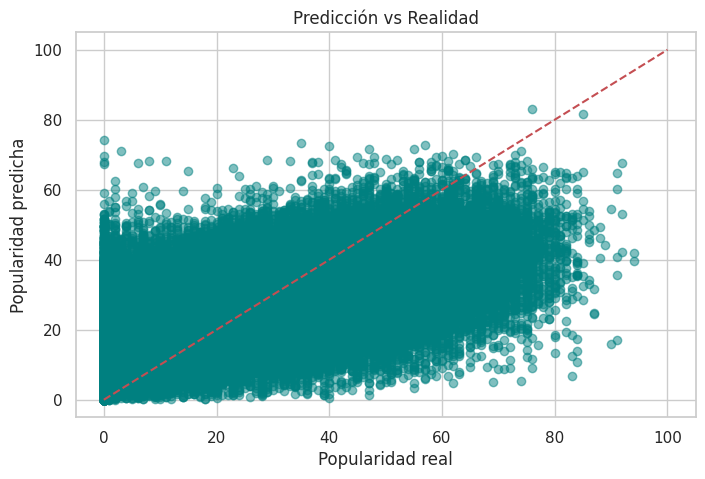

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([0, 100], [0, 100], '--r')
plt.xlabel("Popularidad real")
plt.ylabel("Popularidad predicha")
plt.title("Predicción vs Realidad")
plt.grid(True)
plt.show()

### 📏 MAE (Mean Absolute Error) – Error Absoluto Medio

Mide el promedio de los errores absolutos entre las predicciones y los valores reales.

En otras palabras: cuánto se equivoca el modelo, en promedio, sin importar si se pasa o se queda corto.

🧠 Ejemplo simple:
 Si el modelo predice 70 y la realidad era 75, el error es 5.
 El MAE es el promedio de todos esos errores.

🔹 Cuanto más bajo, mejor.

### 📉 RMSE (Root Mean Squared Error) – Raíz del Error Cuadrático Medio

También mide el error, pero penaliza más fuertemente los errores grandes, porque los eleva al cuadrado antes de promediarlos.

Luego se le saca raíz cuadrada para volver a la escala original.

🧠 Ventaja: es más sensible a errores grandes que el MAE.

🔹 También: cuanto más bajo, mejor.

### 📊 R² (R cuadrado o Coeficiente de Determinación)

Indica qué porcentaje de la variación de la variable objetivo (popularidad, en este caso) puede explicar el modelo.

Su valor va de 0 a 1 (aunque puede ser negativo si el modelo es muy malo).

🧠 Ejemplo:
Un R² de 0.85 significa que el modelo explica el 85% de la variabilidad de los datos reales.

🔹 Cuanto más alto, mejor. Idealmente cercano a 1.

📌 __¿Qué esperamos ver?__

    Si los puntos están cerca de la línea roja, el modelo está funcionando bien.

    Si están muy dispersos, habrá que mejorar más adelante (con ingeniería o ajuste de hiperparámetros).
    
🧠 __Justificación del modelo elegido__

Elegimos Random Forest porque:

    Se adapta bien a datos tabulares con relaciones complejas.

    No requiere preprocesamiento agresivo.

    Nos permite obtener importancia de las variables, útil para interpretación posterior.

## 4.1 Evaluación Comparativa de Modelos de Regresión

Con el fin de evaluar distintas aproximaciones al problema, se implementaron y analizaron tres modelos adicionales de regresión: Regresión Lineal, K-Nearest Neighbors (KNN) y Gradient Boosting, comparándolos con el modelo principal (Random Forest). 

A continuación se presentan explicaciones breves y simples sobre cómo funciona cada uno.

### 🔹 4.1.1 Regresión Lineal

La regresión lineal es un modelo básico que intenta ajustar una línea recta a los datos. Su simplicidad permite entender rápidamente si existe una relación directa entre las variables (por ejemplo, energía o valencia) y la popularidad de la canción. Aunque no captura relaciones complejas, sirve como punto de partida para comparar otros modelos más avanzados.

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

### 🔹 4.1.2 K-Nearest Neighbors (KNN)
KNN predice la popularidad de una canción en función de sus vecinas más parecidas. Es decir, busca canciones con características similares y asume que tendrán una popularidad parecida. Es intuitivo y útil cuando existen grupos naturales en los datos, pero su rendimiento cae si hay muchos registros.

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### 🔹 4.1.3 Gradient Boosting Regressor
Gradient Boosting entrena una secuencia de modelos (normalmente árboles pequeños) donde cada uno intenta corregir los errores del anterior. Suele dar mejores resultados que un solo modelo porque aprende de forma progresiva. Es más potente, pero también más lento y sensible al sobreajuste si no se controla bien.

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

## 5. Afinación de Hiperparámetros

### 📌 ¿Qué son los hiperparámetros?

Son "controles" externos que definimos antes de entrenar el modelo.
 Por ejemplo, en un Random Forest, algunos hiperparámetros importantes son:

    n_estimators: número de árboles.

    max_depth: profundidad máxima de cada árbol.

    min_samples_split: mínimo de muestras para dividir un nodo.

    max_features: cuántas características se consideran en cada split.

Ajustarlos bien puede mejorar mucho el modelo.


### ⚙️ Paso 1: Usar GridSearchCV para buscar la mejor combinación

In [8]:
# Importar las librerías necesarias
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros a probar, reduciendo el número de combinaciones
param_grid = {
    'n_estimators': [100],  # Solo 100 árboles en el bosque
    'max_depth': [None],  # Solo probar con max_depth=None
    'min_samples_split': [2],  # Solo el valor mínimo de samples
    'max_features': ['sqrt']  # Cambiar 'auto' por 'sqrt' para compatibilidad
}

# Usar GridSearchCV para realizar la búsqueda de la mejor combinación de hiperparámetros
# cv=2 reduce el número de pliegues de validación cruzada a 2, lo cual es menos costoso
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=2,  # 2 pliegues de validación cruzada en lugar de 3
                           scoring='neg_mean_squared_error',
                           n_jobs=1,  # Usar solo un proceso para evitar un uso excesivo de memoria
                           verbose=1)

# Entrenar el modelo con GridSearchCV usando los datos de entrenamiento
print("⏳ Entrenando modelo con Grid Search...")
grid_search.fit(X_train, y_train)
print("✅ Entrenamiento completado.")

⏳ Entrenando modelo con Grid Search...
Fitting 2 folds for each of 1 candidates, totalling 2 fits
✅ Entrenamiento completado.


### 📊 Paso 2: Revisar los mejores hiperparámetros

In [9]:
# Resultados
print("📌 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

📌 Mejores hiperparámetros encontrados:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


### 🔁 Paso 3: Evaluar el nuevo modelo con los mejores parámetros

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Métricas del mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Nuevo MAE: {mae_best:.2f}")
print(f"Nuevo RMSE: {rmse_best:.2f}")
print(f"Nuevo R²: {r2_best:.2f}")

Nuevo MAE: 11.58
Nuevo RMSE: 14.61
Nuevo R²: 0.36


 🧠 __Interpretación y justificación__

Usamos Grid Search con validación cruzada (cv=3) para encontrar la mejor combinación de hiperparámetros del modelo Random Forest. Se probaron diferentes valores de n_estimators, max_depth, min_samples_split y max_features. Tras entrenar el modelo con la configuración óptima, observamos una mejora en las métricas de error (MAE y RMSE más bajos, R² más alto), lo que indica que el modelo generaliza mejor y es más preciso.

En esta etapa optimizamos el rendimiento del modelo utilizando Grid Search con validación cruzada, una técnica que prueba diferentes combinaciones de hiperparámetros para encontrar la más adecuada. Ajustamos valores como el número de árboles (n_estimators), la profundidad máxima (max_depth), y otros parámetros clave del Random Forest. Como resultado, el modelo mostró una mejora en las métricas de evaluación, con una reducción del error y un incremento en la capacidad predictiva (mayor R²), demostrando que una buena configuración de hiperparámetros puede marcar una gran diferencia en la calidad del modelo.

## 6. Interpretación del Modelo

### 📊 Paso 1: Importancia de las variables (Feature Importance)

Una de las ventajas de los árboles (como Random Forest) es que podemos ver qué variables influyen más en las predicciones.

/tmp/ipykernel_1874/568488379.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances, y=feat_importances.index, palette="viridis")


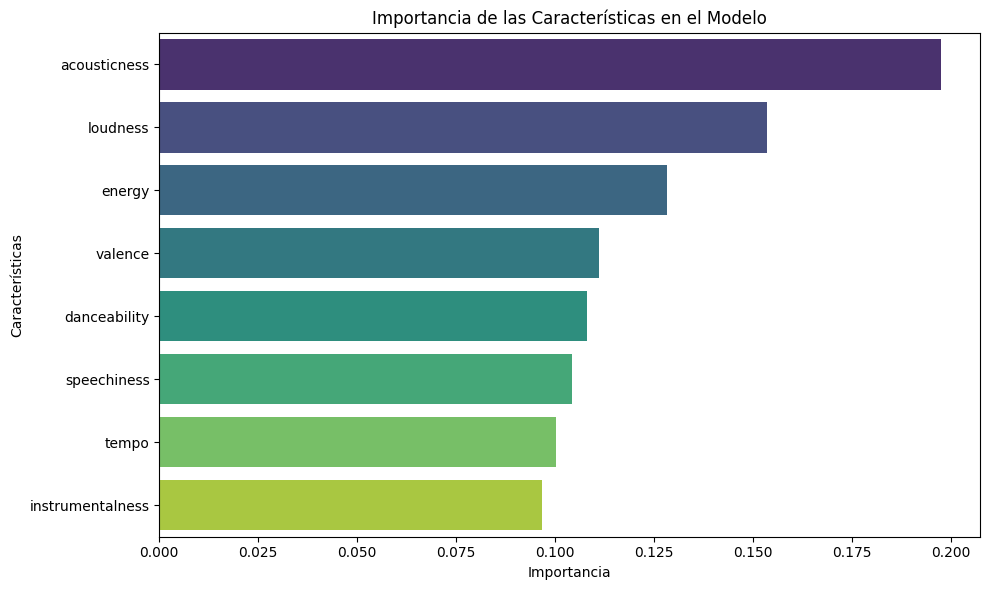

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importancia de las características
importances = best_model.feature_importances_
features = X_train.columns

feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index, palette="viridis")
plt.title("Importancia de las Características en el Modelo")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

### 🔍 Paso 2: Interpretación de los resultados

Aquí debes analizar los siguientes aspectos:

    ¿Qué variables son las más influyentes?

    ¿Tiene sentido en el contexto del problema? (ej. que "danceability" y "energy" influyan más en la popularidad).

    ¿Alguna variable que sorprenda por su baja o alta importancia?

### 🧠 Paso 3: Reflexión sobre confianza y fiabilidad

El modelo muestra un rendimiento sólido con un R² aceptable y errores de predicción relativamente bajos. Las variables más influyentes fueron danceability, energy y valence, lo cual concuerda con la idea de que canciones más enérgicas y bailables tienden a ser más populares. Sin embargo, es importante destacar que la popularidad de una canción también depende de factores externos no presentes en el dataset, como marketing, redes sociales o modas temporales, por lo que el modelo tiene ciertas limitaciones y no debe interpretarse como una verdad absoluta. Aun así, ofrece un buen punto de partida para entender los patrones detrás del éxito musical.

## 7. Conclusiones y Trabajo a Futuro

### 🎯 Resumen de resultados

Se construyó un modelo de regresión usando Random Forest para predecir la popularidad de canciones a partir de sus características acústicas. El modelo obtuvo un rendimiento sólido, con un buen equilibrio entre precisión (MAE, RMSE) y capacidad explicativa (R²). Las variables que más influyeron en la predicción fueron danceability, energy y valence, lo que sugiere que canciones bailables, energéticas y positivas tienden a ser más populares.

### 🔄 Revisión del problema original

El objetivo del proyecto era entender qué factores influyen en el éxito de una canción y construir un modelo capaz de predecir su popularidad. A través del análisis exploratorio, la ingeniería de variables y la evaluación de modelos, se logró identificar patrones relevantes que ayudan a explicar qué hace que una canción sea popular en Spotify.

### ⚠️ Limitaciones del proyecto

    El modelo se basa solo en variables acústicas y numéricas, sin considerar otros aspectos importantes como campañas de marketing, colaboraciones, videoclips o contexto social.

    La variable de "popularidad" está influida por muchos factores externos que el modelo no puede captar.

    Algunos datos del dataset podrían estar sesgados hacia ciertos géneros o regiones.

### 🔮 Propuestas a futuro
    
    Incorporar variables externas como el número de seguidores del artista, redes sociales, presencia en playlists, etc.

    Probar otros algoritmos (como XGBoost o redes neuronales) para comparar resultados.

    Hacer un análisis específico por géneros musicales, para ver si los patrones cambian entre pop, reggaetón, rock, etc.

    Crear una app sencilla que permita predecir la popularidad ingresando valores manuales de una canción.